In [1]:
import sys, os, glob, time
import numpy as N
import subprocess as sp
import pylab as pl

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
rc('font',**{'family':'serif'})
time_init_start = time.time()

# def importlibs(dummy): ####### DEPRECATED FROM FUNCTIONALITY ON LINES [92, 93]
#     """
#     Checks if the module are imported to namespace;
#     * If not imported:     -> import modules
#       # base statement:
#       from <module> import <object>
#     * If already imported: -> reload modules
#     """
    
#     # The order is important
#     items        = ['UserTools',       'Plotter',      'MiscTools',      'Sifters',
#                     'readProcedures',  'readArgs',     'readDo']
#     module_names = ['read_usertools',  'read_plotdoc', 'read_misctools', 'read_sifters',
#                     'read_procedures', 'read_args',    'read']
#     imported = False
    
#     for item, modname in zip(items, module_names):
#         " Cycles through modules "
#         module = 'gravipy_multi.pyread.{0}'.format(modname)
        
#         # print module
#         # print "in sys.modules?:", module in sys.modules
#         if module not in sys.modules:
#             ### From python doc.s:
#             # On the other hand, the statement 'from spam.ham import eggs, sausage as saus' results in

#             # _temp = __import__('spam.ham', globals(), locals(), ['eggs', 'sausage'], -1)
#             # eggs = _temp.eggs
#             # saus = _temp.sausage
            
            
#             " Make global variable of item "
#             globalitem = 'global {0}'.format(item)
#             eval(globalitem)
            
#             globals()[item] = __import__(module)
#             print globalitem
            
#             " The basic import statement, with relative pathing "
#             impstatement = 'from {0} import {1}'.format(module, item)
            
#             exec(impstatement)
#             print impstatement
            
#             imported = True
#             pass
        
#         else:
#             " Reloads the class instances used throughout & their vars in namespace, if any "
#             mod = reload(sys.modules[module])
#             # vars().update(mod.__dict__) # maybe updating namespace is a bad idea
#             pass
        
#         continue # Next module
        
#     if imported == True:
#         print "  * Modules imported "
#         pass
#     else:
#         print "  * Modules updated "
    
#     return 0

def init_importdirs(dummy):
    """
    To make relative imports work - always remember to have
    have an "__init__.py"-file in the directories named 
    in the import statement.
    """
    # import os, sys
    module_folder = os.path.abspath(os.path.join('..'))
    if module_folder not in sys.path:
        sys.path.append(module_folder)
        print "Module-containing folder added to python interpreter's sys.path:", module_folder
        pass

    return 0

init_importdirs(True) # initializes relative import functionality
# importlibs(True)      # imports/updates classes from edited files

# --- --- --- --- --- --- --- --- --- --- --- --- --- #
# THESE TWO LINES MAKE THE NOTEBOOK RELOAD IMPORTED   #
%load_ext autoreload 
%autoreload 2
# FILES, WHEN THE FILES HAVE BEEN EDITED!             #
# --- --- --- --- --- --- --- --- --- --- --- --- --- #

# ### ### ### ### ### ### ### Library   ### ### ### ### ### ### ###
# ### ### ### ### ### ### ### overview: ### ### ### ### ### ### ###

# ==============================================
# Read.& proc. toolkit for data sets' structure.
# ==============================================
from gravipy_multi.pyread.read_usertools import UserTools

# ==============================================
# Read.& proc. data sets' visualisation tools.
# ==============================================
from gravipy_multi.pyread.read_plotdoc import Plotter

# ==============================================
# Reading toolkit for data sets' structure.
# ==============================================
from gravipy_multi.pyread.read_misctools import MiscTools

# ==============================================
# File interpreters for read.py's interface.
# ==============================================
from gravipy_multi.pyread.read_sifters import Sifters

# ==============================================
# Reading procedure for data sets' structure.
# ==============================================
from gravipy_multi.pyread.read_procedures import readProcedures

# ==============================================
# Argument interpreter for read.py's interface.
# ==============================================
from gravipy_multi.pyread.read_args import readArgs

# ==============================================
# Indra data sets' reading MO.
# ==============================================
from gravipy_multi.pyread.read import readDo

# ### ### ### ### ### ### ### ######### ### ### ### ### ### ### ###
# ### ### ### ### ### ### ### ######### ### ### ### ### ### ### ###

time_init_end = time.time()

print "Initialization time: {0:.2f} seconds".format((time_init_end - time_init_start))

Module-containing folder added to python interpreter's sys.path: /home/idies/workspace/persistent
Initialization time: 0.06 seconds


In [2]:
def read_ini( what="pos", indraN=0, iA=0, iB=0, subfolder=None, fftfile=None, 
              tmpfolder=False, sfset=False, sortIDs=False, lessprint=True,
              multiset=False,
              box_params=False,
              outputpath=False,
              w2f=False,
              plotdata=False,
              plotdim=2,
              origamipath=False
            ):

    data_params = \
        { # Data structure parameters:
               "what" :( list(what)  ),
             "indraN" :( indraN      ),
                 "iA" :( iA          ),
                 "iB" :( iB          ),
          "subfolder" :( subfolder   ),
            "fftfile" :( fftfile     ),
            # Reading options:
          "tmpfolder" :( tmpfolder   ),
              "sfset" :( sfset       ),
            "sortIDs" :( sortIDs     ),
          "lessprint" :( lessprint   ),
           "multiset" :( multiset    ),
            # Extracts data from a coordinate box at positions specified:
         "box_params" :( box_params  ),
            # Desired output filepath, 
            # or False (program storing to user's own folder).
         "outputpath" :( outputpath  ),
            # Write 2 file: Probably a bad idea ...
                "w2f" :( w2f         ),
           "plotdata" :( plotdata    ),
            # Apply floats as "([min,max], [min,max], [min,max])" in Mpc/h units,
            # respectively for directions x, y, z. # Turned off w/: None/False
            "plotdim" :( plotdim     ), # Dimensions projected in plot
            # Origami functionality
        "origamipath" :( origamipath )
        }

    tmp = sp.call('clear',shell=True)

    ini = readDo()                # Initialize!
    ini.read_params = data_params # Set params
    " 1. "
    ini.callArgsChecker()         # Verify values
    " 2. "
    return ini.beginReading(), ini     # Do the thing

# The calling function, conveniently placed

In [3]:
" Extract positions - and sort in a later frame "
time_posread_start = time.time()

pos_output, pos_instance = read_ini(
    what       = ["pos"],
    indraN     = 2,
    iA         = 0,
    iB         = 0,
    subfolder  = 63,
    tmpfolder  = True#,
    # sortIDs    = True
    )
time_posread_end = time.time()
print "Reading time: {0:.2f} seconds".format((time_posread_end - time_posread_start))


 Total parameters loaded: 16
 Parameters initialized with values:
        what : ['pos']
      indraN :      2
          iA :      0
          iB :      0
   subfolder :     63
   tmpfolder :   True
       sfset :  False
     sortIDs :  False
   lessprint :   True
    multiset :  False
  box_params :  False
  outputpath :  False
         w2f :  False
    plotdata :  False
     plotdim :      2
 origamipath :  False

            All necessary parameters have been set. Continuing...
            

    --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
        Currently reading:
        Data type   :    pos   (/out of sets:   'pos'    )
        indraN      :      2             ( /:    [2]     )
        iA          :      0             ( /:    [0]     )
        iB          :      0             ( /:    [0]     )
        subfolder   :     63             ( /:    [63]    )
        
  * Accessing file:	indra2tmp/snap63/file.0   (pos) ...
  * Accessing file:	indra2tmp/snap63/file.5

In [4]:
# Arrange output into variables,
# and overwrite variable to not double up on memory consumption
IDs, pos, scalef, rs = pos_output
pos_output = None

In [5]:
IDs, pos, dummy = pos_instance.sort_from_IDsF(IDs, pos=pos, focus="pos")

  * Sorting IDs now ...
    \=> IDs indexes sequenced. 
      : dt = 280.21 s
    \=> IDs sorted. 
      : dt = 23.3967 ss
  * Sorting positions.
    \=> positions' array now sorted by ID tag.
      : dt = 136.74 s


In [6]:
# Read halo IDs
fof_output, fof_instance = read_ini(
                what       = ["fof"],
                indraN     = 2,
                iA         = 0,
                iB         = 0,
                subfolder  = 63,
                tmpfolder  = True#,
                # multiset   = "store"
    )
" Arrange output into variables "
# and overwrite variable to not double up on memory consumption
Ngroups, Nids, TotNgroups, GroupLen, GroupOffset, fofIDs = fof_output
fof_output = None

" Extracting halo IDs "
# Where 'gi=3' refers to a specific halo(?)
# 'gi' == 'group index' (? (makes sense, if I understood this correctly))
gi = 3
fof_haloIDs = fofIDs[GroupOffset[gi]:GroupOffset[gi]+GroupLen[gi]]


 Total parameters loaded: 16
 Parameters initialized with values:
        what : ['fof']
      indraN :      2
          iA :      0
          iB :      0
   subfolder :     63
   tmpfolder :   True
       sfset :  False
     sortIDs :  False
   lessprint :   True
    multiset :  False
  box_params :  False
  outputpath :  False
         w2f :  False
    plotdata :  False
     plotdim :      2
 origamipath :  False

            All necessary parameters have been set. Continuing...
            

    --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
        Currently reading:
        Data type   :    fof   (/out of sets:   'fof'    )
        indraN      :      2             ( /:    [2]     )
        iA          :      0             ( /:    [0]     )
        iB          :      0             ( /:    [0]     )
        subfolder   :     63             ( /:    [63]    )
        
 Browsing FOF-files (tabs):
        ---------------------------------------------------------------

In [7]:
# Extract only the halo particles
pos_hp_fof = pos[fof_haloIDs]

In [8]:
import pylab as pl  # ...reminder of the namespace :)

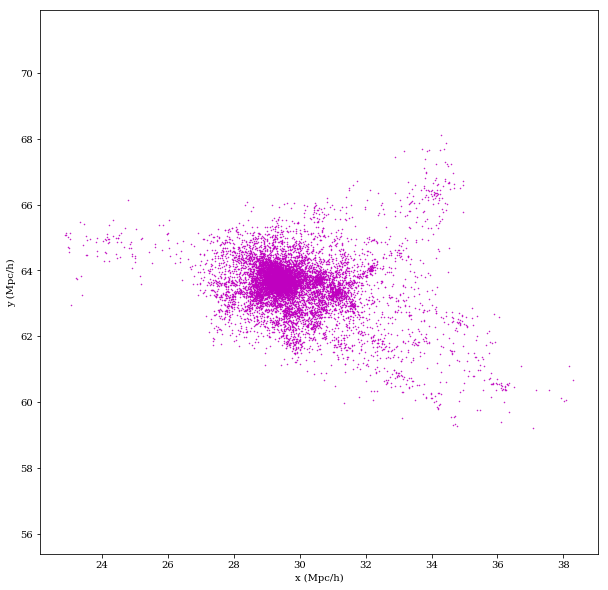

In [9]:
" FoF halo particles "
pl.figure(figsize=(10,10))
pl.scatter( pos_hp_fof[:,0], pos_hp_fof[:,1], s=1, c='m', marker='.' )
pl.xlabel('x (Mpc/h)')
pl.ylabel('y (Mpc/h)')
pl.axis('equal')
pl.show()

In [10]:
# " Isolation of all matter to the vicinity of the halo: cut-out border around halo particles "
# print N.array_equal(pos[fof_haloIDs,0], pos_hp_fof[:,0]) # just double checking

xmin_cutout = N.min(pos_hp_fof[:,0])
xmax_cutout = N.max(pos_hp_fof[:,0])

ymin_cutout = N.min(pos_hp_fof[:,1])
ymax_cutout = N.max(pos_hp_fof[:,1])

zmin_cutout = N.min(pos_hp_fof[:,2])
zmax_cutout = N.max(pos_hp_fof[:,2])

posargs_cutout = N.where( 
    (pos[:,0] < xmax_cutout ) & (pos[:,1] < ymax_cutout ) & (pos[:,2] < zmax_cutout ) &\
    (pos[:,0] > xmin_cutout ) & (pos[:,1] > ymin_cutout ) & (pos[:,2] > zmin_cutout ) 
    )[0]

pos_cutout = pos[posargs_cutout] # cut-out's size based on fof halo particles!

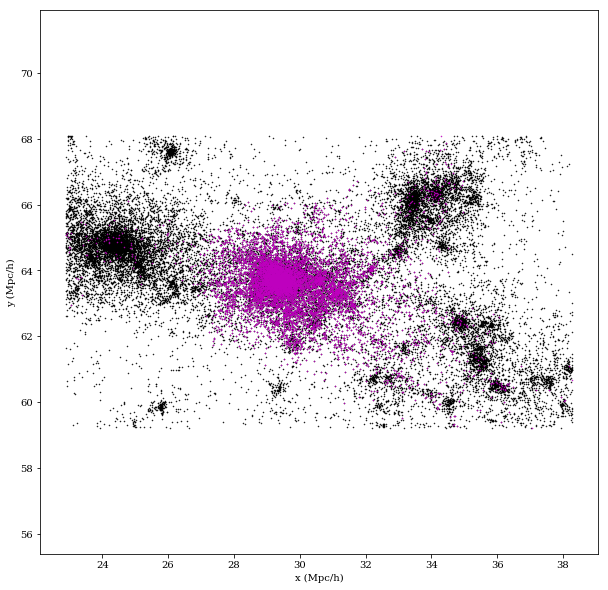

In [11]:
" See/plot the vicinity of the FoF-halo, as well as the halo itself "
pl.figure(figsize=(10,10))
# pl.scatter( pos_cutout[:,0], pos_cutout[:,1], s=1, c='k' )
# pl.scatter( pos_hp[:,0],     pos_hp[:,1],     s=1, c='m' )
pl.scatter( pos_cutout[:,0], pos_cutout[:,1], s=1, c='k', marker='.' )
pl.scatter( pos_hp_fof[:,0], pos_hp_fof[:,1], s=1, c='m', marker='.' )
pl.xlabel('x (Mpc/h)')
pl.ylabel('y (Mpc/h)')
pl.axis('equal')
pl.show()

In [12]:
" Now we want to know how Origami tags these FoF-particles "
# Extract Origami data
oritags, Npart = read_ini(
    what        = ["origami"],
    indraN      = 2,
    iA          = 0,
    iB          = 0,
    subfolder   = 63,
    tmpfolder   = True
)[0]


 Total parameters loaded: 16
 Parameters initialized with values:
        what : ['origami']
      indraN :      2
          iA :      0
          iB :      0
   subfolder :     63
   tmpfolder :   True
       sfset :  False
     sortIDs :  False
   lessprint :   True
    multiset :  False
  box_params :  False
  outputpath :  False
         w2f :  False
    plotdata :  False
     plotdim :      2
 origamipath :  False

            All necessary parameters have been set. Continuing...
            

    --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
        Currently reading:
        Data type   : origami   (/out of sets: 'origami'  )
        indraN      :      2             ( /:    [2]     )
        iA          :      0             ( /:    [0]     )
        iB          :      0             ( /:    [0]     )
        subfolder   :     63             ( /:    [63]    )
        
    Done with loop, now returning data.


In [13]:
# Writing this out in detailto concisely understand the 
# 'operations done' vs. 'what is achieved' [cf. last 2 lines in this block].

" So we make bool-arrays "# that, when applied on positions of a specific FoF-halo (stored previously),
# will extract the positions to a specific origami-type of structure.

# ori(gami)V(oid)tags(')_b(ools)_(for )f(riends )o(f )f(riends')h(alo )p(articles)  #[1st. var. name's expl.]
oriVtags_b_fofhp = oritags[fof_haloIDs] == 0 # ... Voids
oriWtags_b_fofhp = oritags[fof_haloIDs] == 1 # ... Walls
oriFtags_b_fofhp = oritags[fof_haloIDs] == 2 # ... Filaments
oriHtags_b_fofhp = oritags[fof_haloIDs] == 3 # ... Halos (as defined by spherical nature)

# Now, apply these origami-type-specific bool-arrays on the stored FoF-halo particle's positions:
pos_oriV_fofhp = pos_hp_fof[oriVtags_b_fofhp]
pos_oriW_fofhp = pos_hp_fof[oriWtags_b_fofhp]
pos_oriF_fofhp = pos_hp_fof[oriFtags_b_fofhp]
pos_oriH_fofhp = pos_hp_fof[oriHtags_b_fofhp]

# But would it not also be prudent to include the origami tags, of other particles that, are also in the area?
# (- inside the cutout-zone, so to speak.)

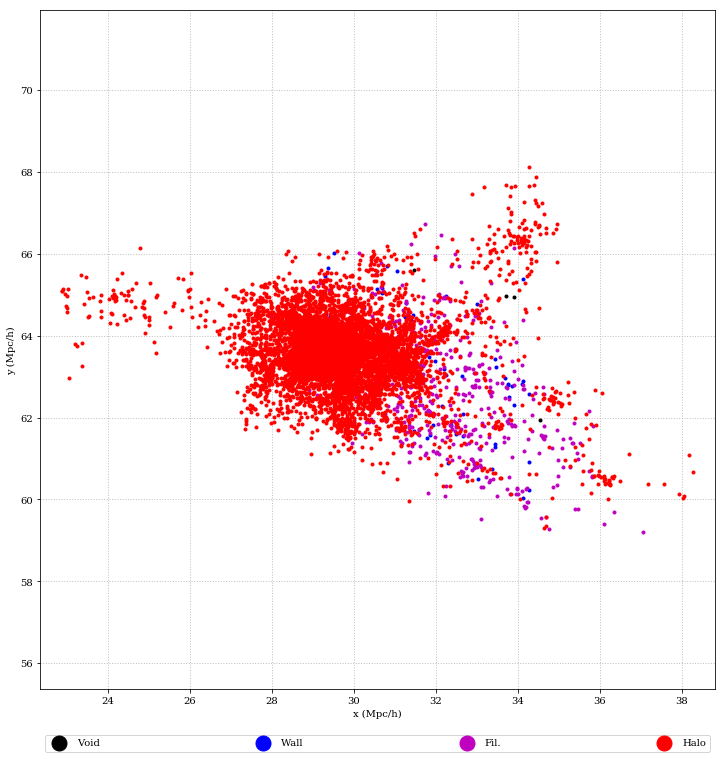

In [14]:
# And here's the plot:
" Origamitags of FoF-Halo (-specific(?(yes?))) particles "
fig = pl.figure(figsize=(10,10))
ax  = fig.add_subplot(111)

ax.scatter( pos_oriV_fofhp[:,0], pos_oriV_fofhp[:,1], c='k', marker='.', label='Void' )
ax.scatter( pos_oriW_fofhp[:,0], pos_oriW_fofhp[:,1], c='b', marker='.', label='Wall' )
ax.scatter( pos_oriF_fofhp[:,0], pos_oriF_fofhp[:,1], c='m', marker='.', label='Fil.' )
ax.scatter( pos_oriH_fofhp[:,0], pos_oriH_fofhp[:,1], c='r', marker='.', label='Halo' )

ax.legend(bbox_to_anchor=(0,0.14, 1,-0.2), loc="upper left", mode="expand",
          ncol=4, prop={'size':10}, markerscale=5)

ax.set_axisbelow(True) # For next line; grid is below marker dots; subtleness, etc
ax.grid(b=True, which='major', axis='both', c='0.75', ls=':', linewidth=1)
ax.axis('equal')

fig.tight_layout() # Doesn't really do much, after aspect ratio fixing :-\
pl.xlabel('x (Mpc/h)')
pl.ylabel('y (Mpc/h)')

pl.show()
pl.close()